<a href="https://colab.research.google.com/github/MurariChilukuri/AI-ML/blob/main/Labsheet_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Create data frame and visualize the natural groupings in the dataset

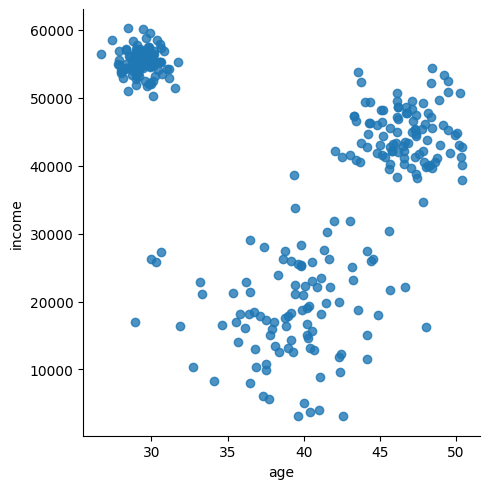

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
df = pd.read_csv('/content/Income Data.csv')
sn.lmplot(x = "age", y = "income", data = df, fit_reg = False)

2.

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df[['age', 'income']])
scaled_df[0:5]

array([[ 1.3701637 ,  0.09718548],
       [-1.3791283 ,  0.90602749],
       [ 1.10388844,  0.51405021],
       [ 0.23849387, -1.27162408],
       [-0.35396857, -1.32762083]])

3. Plotting customers with their segments



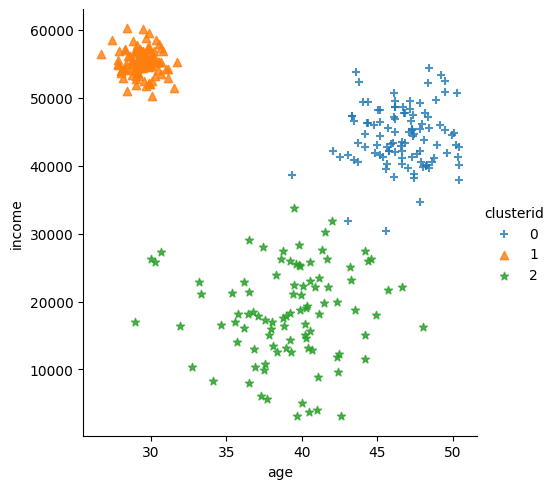

In [12]:
from sklearn.cluster import KMeans
clusters = KMeans(3)
clusters.fit(scaled_df)
df["clusterid"] = clusters.labels_
markers = ['+', '^', '*']
sn.lmplot(x="age", y="income", data=df, hue="clusterid", fit_reg=False, markers=markers)

In [13]:
clusters = KMeans(3)
clusters.fit(scaled_df)
df["new_clusterid"] = clusters.labels_
df.groupby("new_clusterid")[['age', 'income']].agg(['mean', 'std']).reset_index()

new_clusterid        age                  income             
                      mean       std          mean          std
0             0  39.140206  3.558665  18321.649485  6924.747691
1             1  29.384000  0.921458  55204.000000  1951.943864
2             2  46.627184  2.151559  44308.737864  4390.321503

4. Elbow Method

Text(0, 0.5, 'Sum of Squared Error')

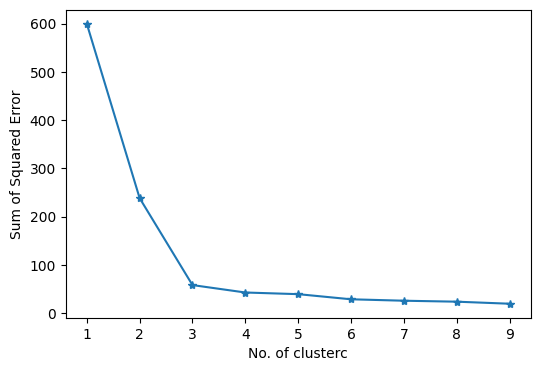

In [14]:
cluster_range = range(1, 10)
cluster_errors = []
for num_clusters in cluster_range:
  clusters = KMeans(num_clusters)
  clusters.fit(scaled_df)
  cluster_errors.append(clusters.inertia_)
plt.figure(figsize = (6,4))
plt.plot(cluster_range, cluster_errors, marker = '*')
plt.xlabel("No. of clusterc")
plt.ylabel("Sum of Squared Error")